## Import the Libraries and Data

https://towardsdatascience.com/linear-regression-models-4a3d14b8d368

In [1]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [34]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [52]:
house = pd.read_csv("data/Maison.csv")
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [53]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Data Transformations & Analysis

In [54]:
house.describe()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


## Insights as per the data skeweness is there in the price and area column

In [55]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      546 non-null    int64
 1   area       546 non-null    int64
 2   rooms      546 non-null    int64
 3   bathroom   546 non-null    int64
 4   floors     546 non-null    int64
 5   driveway   546 non-null    int64
 6   game_room  546 non-null    int64
 7   cellar     546 non-null    int64
 8   gas        546 non-null    int64
 9   air        546 non-null    int64
 10  garage     546 non-null    int64
 11  situation  546 non-null    int64
dtypes: int64(12)
memory usage: 55.5+ KB


In [56]:
print(house.shape)
house.drop_duplicates(inplace = True)
print(house.shape)

(546, 12)
(545, 12)


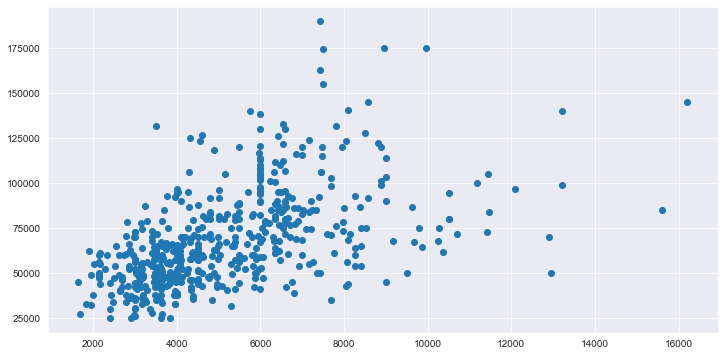

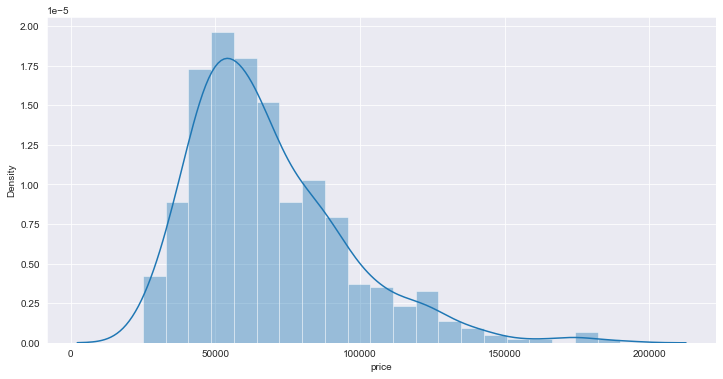

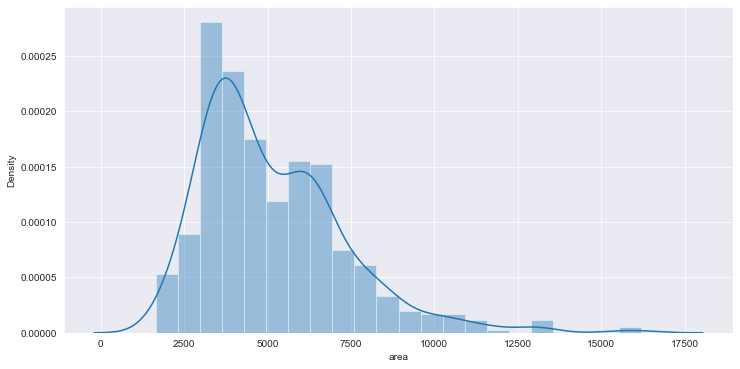

In [57]:
# Let's see ig we have a linear relation between price and area
#sns.palettes(house['area'], house['price'], palette = 'viridis')
plt.scatter(house['area'], house['price'])
plt.show()
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['price'])
plt.show()
sns.distplot(house['area'])
plt.show()

### Removing the out liers

In [58]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1  # Consedering 1.5 for 3mu which is 99% ,Consider 1 for only 2 mu which is 95 %
        #Detect outlier and their indices
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 0)
    
    return multiple_outliers

In [59]:
# removing the out liers
print(house.shape)
house = house.drop(detect_outliers(house,["area"]),axis=0).reset_index(drop = True) # "price",
print(house.shape)

(545, 12)
(520, 12)


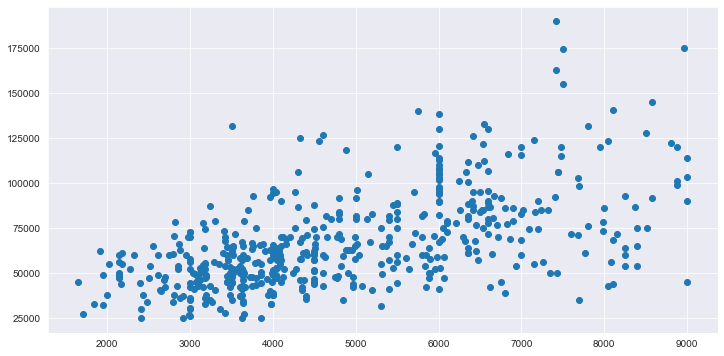

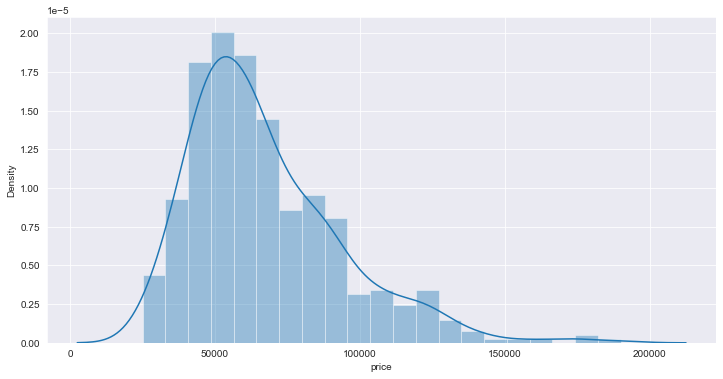

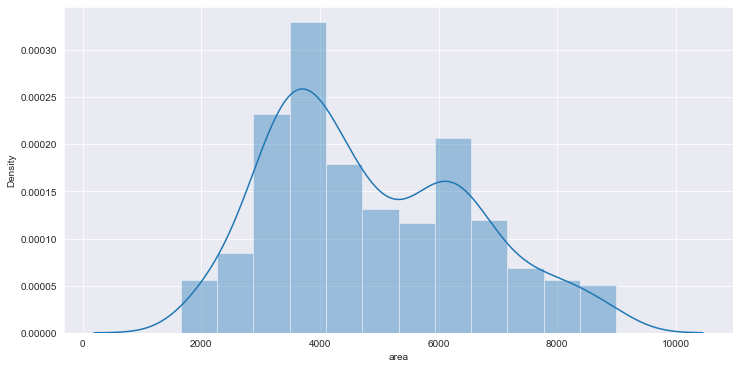

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,67206.330769,4855.353846,2.961538,1.284615,1.819231,0.851923,0.180769,0.348077,0.046154,0.319231,0.665385,0.221154
std,26286.010817,1696.519869,0.736119,0.500244,0.876813,0.355518,0.385197,0.476819,0.210020,0.466627,0.853167,0.415424
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48800.000000,3520.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61000.000000,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,81062.500000,6042.500000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,9000.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [60]:
# after removing the out liers how does this look like
plt.scatter(house['area'], house['price'])
plt.show()
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['price'])
plt.show()
sns.distplot(house['area'])
plt.show()
house.describe()

### Finding the Coorilation to remove highly coorilated variables

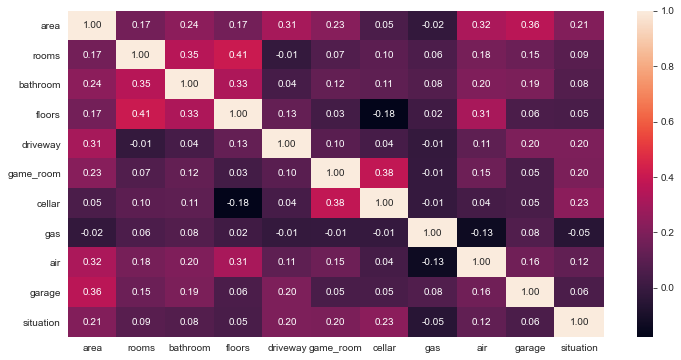

In [44]:
list1 = [i for i in house.columns if i != 'price']
sns.heatmap(house[list1].corr(), annot = True , fmt=".2f")
plt.show()
# as you see there are not much highly coorilated values

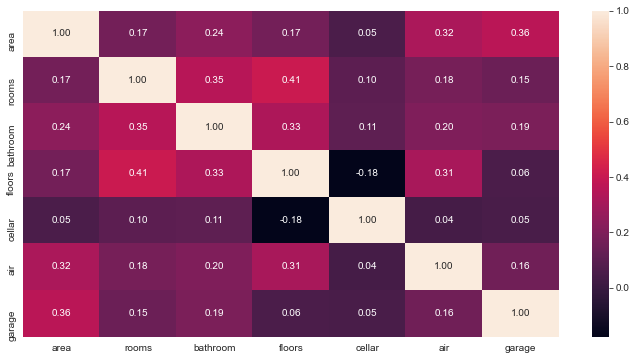

In [45]:
list1 = ["game_room", "driveway", "gas", "situation"]
house.drop(list1, axis=1, inplace=True)
list1 = [i for i in house.columns if i != 'price']
sns.heatmap(house[list1].corr(), annot = True , fmt=".2f")
plt.show()

In [46]:
# for i in house.columns:
#     print(f"-------------{i}-----------------")
#     print(house[i].describe())
#     print(f"---------------------------------")
# [i for i in house.columns if i != 'price']

In [61]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [62]:
house[[i for i in house.columns if i != 'house']]

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,91500,4800,3,2,4,1,1,0,0,1,0,0
516,94000,6000,3,2,4,1,0,0,0,1,0,0
517,103000,6000,3,2,4,1,1,0,0,1,1,0
518,105000,6000,3,2,2,1,1,0,0,1,1,0


In [79]:
# We now instatiate a Linear Regression object
lm = LinearRegression()
# let's do the split of the dataset
house.columns
X = house[[i for i in house.columns if i != 'house']] # 
y = house[[i for i in house.columns if i == 'price']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=303) #303 
## Let's chec the head of some of these splits
X_test.head()
# We see that they are randomly selected

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
51,57000,4100,4,1,1,0,0,1,0,0,0,0
482,71900,4800,2,1,1,1,1,1,0,0,0,0
151,42000,3600,3,1,2,0,0,0,0,0,1,0
375,86000,8000,3,1,1,1,1,1,0,1,2,1
404,61100,3400,3,1,2,1,0,1,0,0,2,1


In [80]:
X.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [81]:
y.head()

,price
0,42000
1,38500
2,49500
3,60500
4,61000


In [84]:
lm.fit(X_test,y_test)

LinearRegression()

In [87]:
print(lm.coef_)
print(X.columns)
coef = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
coef

[[ 1.00000000e+00  3.93703116e-16  8.64472939e-13 -1.21590105e-12
  -4.65435691e-13 -4.25367296e-12 -2.37646135e-12  2.17442314e-12
  -6.81574903e-13 -1.48340311e-12 -2.48542351e-13 -1.34869388e-12]]
Index(['price', 'area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation'],
      dtype='object')


ValueError: Shape of passed values is (1, 12), indices imply (12, 1)

In [50]:
import statsmodels.api as sm

In [51]:
X_endog = sm.add_constant(X_test)
res = sm.OLS(y_test, X_endog)
res.fit()
res.fit().summary()

ValueError: shapes (104,0) and (104,0) not aligned: 0 (dim 1) != 104 (dim 0)

In [110]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
maxcv = None
maxi = None
mincv = None
mini = None
for i in range(1,400):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)    
    lr = LinearRegression().fit(X_train, y_train)
    scores = cross_val_score(lr,
                                 X_train,
                                 y_train,
                                 cv=5,
                                 scoring='r2')
    if maxcv == None:
        maxi = i
        maxcv = np.mean(scores)
    elif maxcv < np.mean(scores):
        maxcv = np.mean(scores)
        maxi = i
    if mincv == None:
        mincv = np.mean(scores)
        mini = i
    elif mincv > np.mean(scores): 
        mincv = np.mean(scores)
        mini = i
print(f""" MAX CV = {maxcv} at i = {maxi} \n 
           MIN CV = {mincv} at i = {mini} """)        
#     print("-------------------------")
#     get_cv_scores(lr)

 MAX CV = 0.708022272080955 at i = 621 
 
           MIN CV = 0.5909828221255625 at i = 727 
